<a href="https://colab.research.google.com/github/selvimaharanip/bi-analyst-portfolio/blob/main/bootcamp-projects/data-cleaning/data_cleaning_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

Data cleaning is a crucial step in the data analysis process because it ensures that the dataset is accurate, consistent, and reliable before any analysis is conducted. By addressing issues such as missing values, outliers, duplicates, and incorrect data formats, data cleaning helps reduce noise, prevent misleading results, and improve the validity of insights generated from the data.

Performing data cleaning prior to analysis is essential because raw data often contains errors or inconsistencies that can distort analytical outcomes, lead to incorrect conclusions, and negatively impact decision-making. A well-cleaned dataset provides a solid foundation for meaningful analysis, accurate modeling, and trustworthy business insights.

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_sample = pd.read_csv("/content/drive/MyDrive/Bootcamp/Sample data/hw_transactions.csv")

In every task involving data analysis, the first step that must be performed after importing the libraries and dataset is to familiarize ourselves with the data.

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
# Checking data types
df_sample.dtypes

,0
accountNumber,int64
customerId,int64
creditLimit,int64
availableMoney,float64
transactionDateTime,object
transactionAmount,float64
merchantName,object
acqCountry,object
merchantCountryCode,object
posEntryMode,float64


In [ ]:
# Checking sample data
df_sample.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,0.00,False,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,111.33,False,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,136.08,False,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,323.48,False,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False
5,733493772,733493772,5000,4449.18,2016-01-16T21:35:27,9.80,Fresh eCards,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,550.82,False,False
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,560.62,False,False
7,733493772,733493772,5000,4191.39,2016-01-26T05:28:24,0.00,Universe Massage #95463,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,ADDRESS_VERIFICATION,False,808.61,False,False
8,733493772,733493772,5000,4191.39,2016-01-26T12:18:14,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,808.61,True,False
9,733493772,733493772,5000,4179.85,2016-01-26T12:19:15,11.54,Universe Massage #70014,US,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,REVERSAL,False,820.15,True,False


In [ ]:
df_sample.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,638569.000000,641627.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.136460,3.238367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.961185,9.680862,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


In [ ]:
df_sample.describe(include=[object])

,transactionDateTime,merchantName,acqCountry,merchantCountryCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType
count,641914,641914,638001,641290,641914,641914,641914,641914,641325
unique,635472,2493,4,4,19,165,1826,2186,3
top,2016-01-19T04:26:56,Lyft,US,US,online_retail,1/5/2026,11/12/2015,20/7/2016,PURCHASE
freq,3,25311,632303,635577,161469,4209,10137,3948,608685


# Tasks in Data Cleaning

After exploration and familiarization with the data, the following steps must be carried out in the data cleaning stage:

1. Handling Missing Values
2. Handling Outliers
3. Removing Duplicates
4. Correcting Data Formats

# Handling Missing Values

## Checking for missing values in the dataset

In [ ]:
# Checking missing values per records
df_sample.isnull()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
641910,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
641911,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
641912,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Looking at columns that have missing values
df_sample[df_sample.isnull().any(axis = 1)]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
6,733493772,733493772,5000,4439.38,2016-01-24T07:54:01,247.99,Uber,NaN,US,5.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,560.62,False,False
32,733493772,733493772,5000,2457.68,2016-03-26T17:23:05,341.98,Uber,US,US,NaN,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,2542.32,False,False
153,733493772,733493772,5000,559.50,2016-11-17T20:33:50,266.66,Uber,US,US,NaN,...,3/8/2014,26/6/2016,492,492,9184,PURCHASE,False,4440.50,False,False
201,578754168,578754168,5000,4676.42,2016-08-26T13:09:55,93.44,Boston Cafe #592935,NaN,NaN,9.0,...,21/10/2015,21/10/2015,413,413,5279,PURCHASE,False,323.58,True,False
563,223895414,223895414,50000,50000.00,2016-01-03T17:33:49,144.04,Franks Restaurant,NaN,US,9.0,...,31/5/2014,31/5/2014,671,671,2849,PURCHASE,False,0.00,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641330,298100844,298100844,5000,1665.99,2016-06-13T02:51:23,94.87,Ray's Fries #745083,US,US,NaN,...,30/3/2014,5/1/2016,204,204,6087,PURCHASE,False,3334.01,True,False
641511,298100844,298100844,5000,678.23,2016-10-25T05:30:34,189.98,Downtown Pub,US,US,NaN,...,30/3/2014,5/1/2016,881,881,5160,PURCHASE,False,4321.77,True,False
641626,877651598,877651598,7500,5854.66,2016-11-21T02:19:09,52.51,Lyft,NaN,NaN,5.0,...,7/1/2012,7/1/2012,547,547,3593,PURCHASE,False,1645.34,False,False
641780,455115932,455115932,50000,36162.74,2016-08-20T08:20:20,2.12,Fresh Online Services,US,US,9.0,...,2/2/2011,2/2/2011,148,148,2521,NaN,False,13837.26,False,False


In [ ]:
# Checking the number of missing data in every column
df_sample.isnull().sum()

,0
accountNumber,0
customerId,0
creditLimit,0
availableMoney,0
transactionDateTime,0
transactionAmount,0
merchantName,0
acqCountry,3913
merchantCountryCode,624
posEntryMode,3345


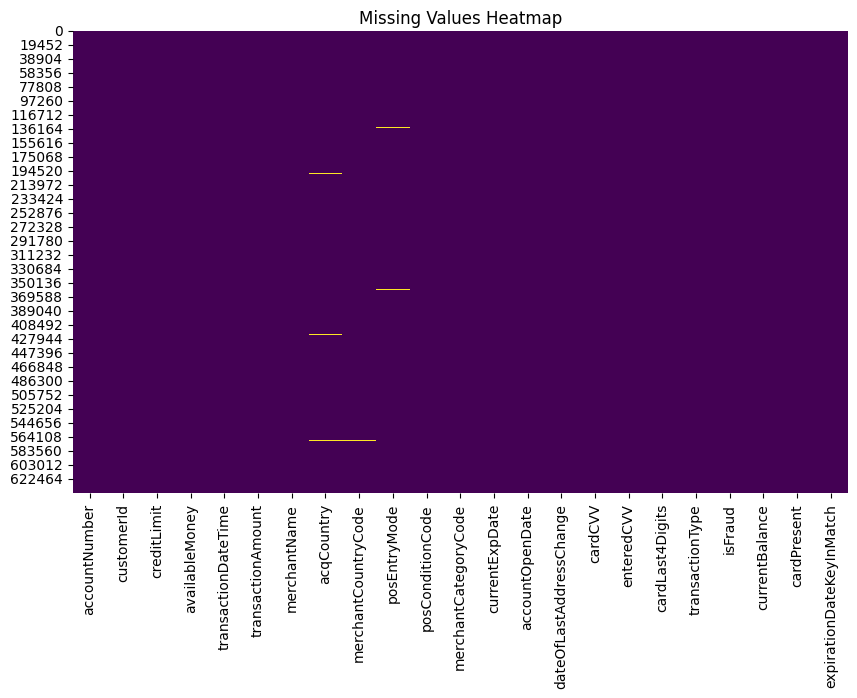

In [ ]:
# Use heatmap to visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(df_sample.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Imputing missing values

Based on the calculation of the percentage of missing values for each column, all columns with missing data show a very small proportion compared to the total of 641,914 rows, as follows:

* acqCountry: 0.61%
* merchantCountryCode: 0.09%
* posEntryMode: 0.52%
* posConditionCode: 0.04%
* transactionType: 0.09%

With such a low level of missing data, actions such as dropping rows are not necessary. The total missing values across all columns account for only about 0.62% of the dataset, and dropping rows would result in the removal of approximately 3,913 records.

The best approach is to impute the missing values, either by using a special category such as “Unknown” for categorical data or by using the mode for numerical data.

This approach preserves nearly the entire dataset while maintaining its quality for subsequent analysis.

### acqCountry

In [ ]:
df_sample["acqCountry"] = df_sample["acqCountry"].fillna("Unknown")
print(df_sample["acqCountry"])

0         US
1         US
2         US
3         US
4         US
          ..
641909    US
641910    US
641911    US
641912    US
641913    US
Name: acqCountry, Length: 641914, dtype: object


### merchantCountryCode

In [ ]:
df_sample["merchantCountryCode"] = df_sample["merchantCountryCode"].fillna("Unknown")
print(df_sample["merchantCountryCode"])

0         US
1         US
2         US
3         US
4         US
          ..
641909    US
641910    US
641911    US
641912    US
641913    US
Name: merchantCountryCode, Length: 641914, dtype: object


### transactionType

In [ ]:
df_sample["transactionType"] = df_sample["transactionType"].fillna("Unknown")
print(df_sample["transactionType"])

0                     PURCHASE
1                     PURCHASE
2                     PURCHASE
3                     PURCHASE
4         ADDRESS_VERIFICATION
                  ...         
641909                PURCHASE
641910                PURCHASE
641911                PURCHASE
641912                PURCHASE
641913                PURCHASE
Name: transactionType, Length: 641914, dtype: object


### posEntryMode

In [ ]:
df_sample["posEntryMode"] = df_sample["posEntryMode"].fillna(df_sample["posEntryMode"].mode()[0])
print(df_sample["posEntryMode"])

0         5.0
1         9.0
2         5.0
3         2.0
4         2.0
         ... 
641909    5.0
641910    9.0
641911    2.0
641912    9.0
641913    9.0
Name: posEntryMode, Length: 641914, dtype: float64


### posConditionCode

In [ ]:
df_sample["posConditionCode"] = df_sample["posConditionCode"].fillna(df_sample["posConditionCode"].mode()[0])
print(df_sample["posConditionCode"])

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
641909    8.0
641910    1.0
641911    1.0
641912    8.0
641913    1.0
Name: posConditionCode, Length: 641914, dtype: float64


## Checking the imputation results

In [ ]:
print("\nMissing values setelah imputasi:")
print(df_sample.isnull().sum())


Missing values setelah imputasi:
accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64


In [ ]:
df_sample[df_sample.isnull().any(axis = 1)]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


All missing values in the five columns that previously contained empty data (acqCountry, merchantCountryCode, posEntryMode, posConditionCode, and transactionType) have been successfully filled using the appropriate fillna methods based on data type, namely the value “Unknown” for categorical columns and the mode value for numerical columns.

After the imputation was applied directly to the dataframe, the validation results indicate that there are no remaining missing values. Therefore, the dataset is now clean and ready for further analysis.

# Handling Outlier

### creditLimit

<Axes: xlabel='creditLimit'>

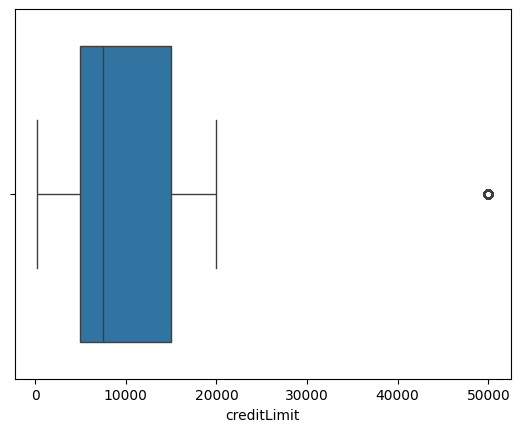

In [ ]:
import seaborn as sns

sns.boxplot(x=df_sample["creditLimit"])

### availableMoney

<Axes: xlabel='availableMoney'>

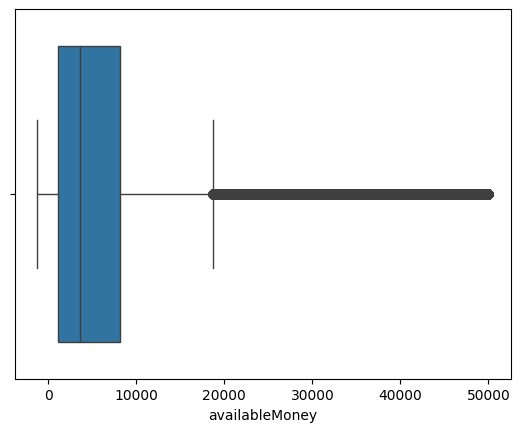

In [ ]:
sns.boxplot(x=df_sample["availableMoney"])

### transactionAmount

<Axes: xlabel='transactionAmount'>

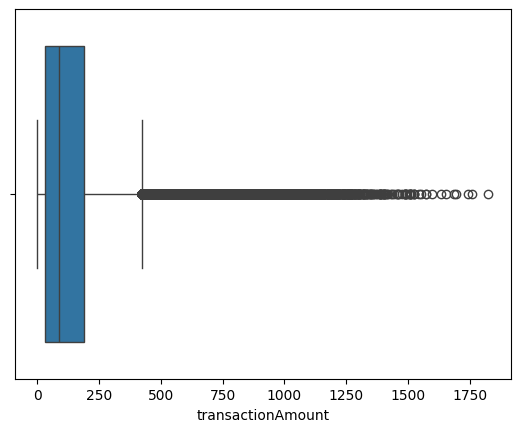

In [ ]:
sns.boxplot(x=df_sample["transactionAmount"])

### currentBalance

<Axes: xlabel='currentBalance'>

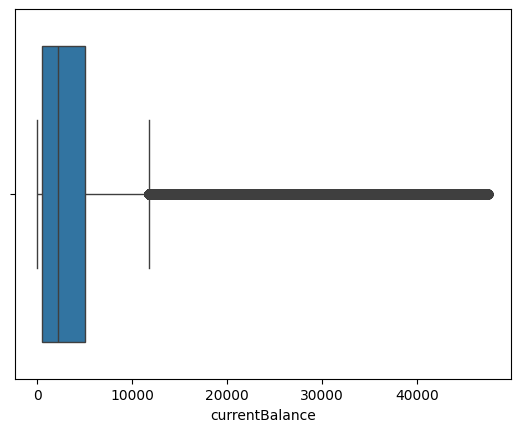

In [ ]:
sns.boxplot(x=df_sample["currentBalance"])

## Calculating the IQR

In [ ]:
df_sample.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,9.114905,3.237367,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,16.919556,9.678814,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,2.000000,1.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,2.000000,1.000000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,5.000000,1.000000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,9.000000,1.000000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,90.000000,99.000000,998.000000,998.000000,9998.000000,47496.500000


### IQR value on creditLimit

In [ ]:
q1_credit = 5000.000000
q2_credit = 7500.000000
q3_credit = 15000.000000

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_credit = q3_credit - q1_credit

In [ ]:
# Find lower and upper bound
lower_bound_credit = q1_credit - (1.5 * iqr_credit)
upper_bound_credit = q3_credit + (1.5 * iqr_credit)

print('lower bound creditLimit:', lower_bound_credit)
print('upper bound creditLimit:', upper_bound_credit)

lower bound creditLimit: -10000.0
upper bound creditLimit: 30000.0


In [ ]:
df_sample[df_sample.creditLimit < lower_bound_credit]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


In [ ]:
df_sample[df_sample.creditLimit > upper_bound_credit]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
563,223895414,223895414,50000,50000.00,2016-01-03T17:33:49,144.04,Franks Restaurant,Unknown,US,9.0,...,31/5/2014,31/5/2014,671,671,2849,PURCHASE,False,0.00,True,False
564,223895414,223895414,50000,49855.96,2016-01-12T00:43:13,150.31,1st Deli,US,US,9.0,...,31/5/2014,31/5/2014,905,905,580,PURCHASE,False,144.04,True,False
565,223895414,223895414,50000,49705.65,2016-01-18T02:45:54,284.96,South Steakhouse #73819,US,US,2.0,...,31/5/2014,31/5/2014,671,671,2849,PURCHASE,False,294.35,True,False
566,223895414,223895414,50000,49445.69,2016-02-02T12:45:21,113.24,Dinosaur Sandwitch Bar #249717,US,US,2.0,...,31/5/2014,31/5/2014,905,905,580,PURCHASE,False,554.31,True,False
567,223895414,223895414,50000,49332.45,2016-02-13T21:34:29,246.26,Regal Cinemas #05791,US,US,2.0,...,31/5/2014,31/5/2014,671,671,2849,PURCHASE,False,667.55,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641850,455115932,455115932,50000,27691.72,2016-12-22T19:37:04,51.42,Fresh Flowers,US,US,2.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22308.28,False,False
641851,455115932,455115932,50000,27640.30,2016-12-23T04:30:15,105.43,Fresh Online Services,US,US,9.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22359.70,False,False
641852,455115932,455115932,50000,27534.87,2016-12-27T05:23:27,43.05,Shell Gas #988905,US,US,5.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22465.13,True,False
641853,455115932,455115932,50000,27491.82,2016-12-29T22:27:46,5.93,Next Day eCards,US,US,5.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22508.18,False,False


### IQR value on availableMoney

In [ ]:
q1_money = 1114.970000
q2_money = 3578.165000
q3_money = 8169.185000

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_money = q3_money - q1_money

In [ ]:
# Find lower and upper bound
lower_bound_money = q1_money - (1.5 * iqr_money)
upper_bound_money = q3_money + (1.5 * iqr_money)

print('lower bound availableMoney:', lower_bound_money)
print('upper bound availableMoney:', upper_bound_money)

lower bound availableMoney: -9466.3525
upper bound availableMoney: 18750.5075


In [ ]:
df_sample[df_sample.availableMoney < lower_bound_money]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


In [ ]:
df_sample[df_sample.availableMoney > upper_bound_money]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
454,523868625,523868625,20000,20000.00,2016-02-27T07:54:30,3.29,Apple iTunes,US,US,9.0,...,1/12/2012,1/12/2012,687,687,3332,PURCHASE,False,0.00,False,False
455,523868625,523868625,20000,20000.00,2016-03-30T06:31:36,3.29,Apple iTunes,US,US,9.0,...,1/12/2012,1/12/2012,687,687,3332,PURCHASE,False,0.00,False,False
456,523868625,523868625,20000,20000.00,2016-04-30T05:07:49,3.29,Apple iTunes,US,US,9.0,...,1/12/2012,1/12/2012,687,687,3332,PURCHASE,False,0.00,False,False
457,523868625,523868625,20000,20000.00,2016-05-31T22:00:43,3.29,Apple iTunes,US,US,9.0,...,1/12/2012,1/12/2012,687,687,3332,PURCHASE,False,0.00,False,False
458,523868625,523868625,20000,20000.00,2016-07-02T11:35:59,3.29,Apple iTunes,US,US,9.0,...,1/12/2012,1/12/2012,687,687,3332,PURCHASE,False,0.00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641850,455115932,455115932,50000,27691.72,2016-12-22T19:37:04,51.42,Fresh Flowers,US,US,2.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22308.28,False,False
641851,455115932,455115932,50000,27640.30,2016-12-23T04:30:15,105.43,Fresh Online Services,US,US,9.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22359.70,False,False
641852,455115932,455115932,50000,27534.87,2016-12-27T05:23:27,43.05,Shell Gas #988905,US,US,5.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22465.13,True,False
641853,455115932,455115932,50000,27491.82,2016-12-29T22:27:46,5.93,Next Day eCards,US,US,5.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22508.18,False,False


### IQR value on transactionAmount

In [ ]:
q1_transaction = 32.320000
q2_transaction = 85.800000
q3_transaction = 189.030000

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_transaction = q3_transaction - q1_transaction

In [ ]:
# Find lower and upper bound
lower_bound_transaction = q1_transaction - (1.5 * iqr_transaction)
upper_bound_transaction = q3_transaction + (1.5 * iqr_transaction)

print('lower bound transactionAmount:', lower_bound_transaction)
print('upper bound transactionAmount:', upper_bound_transaction)

lower bound transactionAmount: -202.745
upper bound transactionAmount: 424.095


In [ ]:
df_sample[df_sample.transactionAmount < lower_bound_transaction]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


In [ ]:
df_sample[df_sample.transactionAmount > upper_bound_transaction]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
21,733493772,733493772,5000,3488.04,2016-02-23T13:04:35,467.88,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,1511.96,False,False
22,733493772,733493772,5000,3020.16,2016-02-23T13:05:35,467.88,Uber,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,REVERSAL,False,1979.84,False,False
49,733493772,733493772,5000,1241.65,2016-05-01T17:42:54,464.01,Dunkin' Donuts #48174,US,US,9.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,3758.35,True,False
80,733493772,733493772,5000,2394.36,2016-06-16T06:43:35,665.84,Lyft,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,True,2605.64,False,False
84,733493772,733493772,5000,1576.12,2016-06-20T13:51:35,665.21,Uber,US,US,2.0,...,3/8/2014,3/8/2014,492,492,9184,PURCHASE,False,3423.88,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641827,455115932,455115932,50000,30502.66,2016-11-11T06:38:59,530.42,Mobile eCards,US,US,5.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,19497.34,False,False
641865,186770399,186770399,7500,7377.86,2016-03-24T06:27:02,664.63,Fresh eCards,US,US,5.0,...,4/11/2015,4/11/2015,127,127,5432,PURCHASE,False,122.14,False,False
641872,186770399,186770399,7500,6287.79,2016-05-28T14:55:58,550.89,Next Day eCards,US,US,5.0,...,4/11/2015,4/11/2015,127,127,5432,PURCHASE,False,1212.21,False,False
641892,186770399,186770399,7500,4855.72,2016-09-06T03:11:56,463.33,Next Day Online Services,US,US,5.0,...,4/11/2015,3/6/2016,127,127,5432,PURCHASE,False,2644.28,False,False


### IQR value on currentBalance

In [ ]:
q1_balance = 502.442500
q2_balance = 2151.860000
q3_balance = 5005.890000

In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr_balance = q3_balance - q1_balance

In [ ]:
# Find lower and upper bound
lower_bound_balance = q1_balance - (1.5 * iqr_balance)
upper_bound_balance = q3_balance + (1.5 * iqr_balance)

print('lower bound currentBalance:', lower_bound_balance)
print('upper bound currentBalance:', upper_bound_balance)

lower bound currentBalance: -6252.72875
upper bound currentBalance: 11761.06125


In [ ]:
df_sample[df_sample.currentBalance < lower_bound_balance]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


In [ ]:
df_sample[df_sample.currentBalance > upper_bound_balance]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch
1778,782400169,782400169,15000,3180.18,2016-03-06T14:01:50,8.37,NY Deli,US,US,9.0,...,31/12/2012,31/12/2012,298,298,6964,PURCHASE,False,11819.82,True,False
1779,782400169,782400169,15000,3171.81,2016-03-06T14:24:48,68.11,South Steakhouse #335249,US,US,9.0,...,31/12/2012,31/12/2012,978,978,5055,PURCHASE,False,11828.19,True,False
1780,782400169,782400169,15000,3103.70,2016-03-06T23:24:33,14.27,South Steakhouse #157238,US,US,9.0,...,31/12/2012,31/12/2012,978,978,5055,PURCHASE,False,11896.30,True,False
1781,782400169,782400169,15000,3089.43,2016-03-09T04:25:17,104.67,34th BBQ #493821,US,US,5.0,...,31/12/2012,31/12/2012,298,298,6964,PURCHASE,False,11910.57,True,False
1782,782400169,782400169,15000,2984.76,2016-03-10T07:25:39,133.98,Dinosaur Sandwitch Bar #960325,US,US,80.0,...,31/12/2012,31/12/2012,298,298,6964,PURCHASE,False,12015.24,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641850,455115932,455115932,50000,27691.72,2016-12-22T19:37:04,51.42,Fresh Flowers,US,US,2.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22308.28,False,False
641851,455115932,455115932,50000,27640.30,2016-12-23T04:30:15,105.43,Fresh Online Services,US,US,9.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22359.70,False,False
641852,455115932,455115932,50000,27534.87,2016-12-27T05:23:27,43.05,Shell Gas #988905,US,US,5.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22465.13,True,False
641853,455115932,455115932,50000,27491.82,2016-12-29T22:27:46,5.93,Next Day eCards,US,US,5.0,...,2/2/2011,2/2/2011,148,148,2521,PURCHASE,False,22508.18,False,False


Based on the analysis results, it can be concluded that for data related to fraud detection, outliers should not be removed because extreme values are often important indicators of fraudulent activity.

In this dataset, most outliers tend to be right-skewed and lie above the upper IQR, indicating that large extreme values occur more frequently than extremely low values. Such a pattern typically represents abnormal transaction behavior that is relevant for fraud detection. Therefore, outliers should be retained and not removed or excessively transformed.

# Handling Duplicate Values

In [ ]:
# Checking whether duplicate rows exist
df_sample.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
641909,False
641910,False
641911,False
641912,False


In [ ]:
df_sample.duplicated().sum()

np.int64(0)

In [ ]:
# Retrieving duplicated records (keeping the top row)
df_sample[df_sample.duplicated()]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch


Based on the analysis results, it is known that there are no duplicated records in this dataset; therefore, no drop.duplicates operation is required.

# Changing Data Formats

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                641914 non-null  object 
 8   merchantCountryCode       641914 non-null  object 
 9   posEntryMode              641914 non-null  float64
 10  posConditionCode          641914 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

Based on the information above, several variables have data types that are not appropriate and therefore need to be reformatted to facilitate further analysis.

Variables that require format changes:

1. Date columns need to be converted to datetime format so they can be used for time-based analysis, sorting, and date difference calculations (**transactionDateTime, currentExpDate, accountOpenDate, dateOfLastAddressChange**).

2. Numerical columns that should be converted to categorical data (**posEntryMode, posConditionCode, cardCVV, enteredCVV, cardLast4Digits**). This is because the values in these columns represent codes or categories rather than quantities to be calculated, making categorical treatment more efficient and preventing incorrect numerical interpretation.

3. The **accountNumber** and **customerId** columns should be converted to categorical types because both serve only as unique identifiers and do not contain numerical meaning, so they should not be treated as numeric values in the analysis.

In [ ]:
# Convert ID columns → object

id_cols = ["accountNumber", "customerId"]
df_sample[id_cols] = df_sample[id_cols].astype("object")

In [ ]:
# Convert numerical codes → category

numerical_code_cols = [
    "posEntryMode",
    "posConditionCode",
    "cardCVV",
    "enteredCVV",
    "cardLast4Digits"
]

df_sample[numerical_code_cols] = df_sample[numerical_code_cols].astype("category")

In [ ]:
# Convert date columns → datetime

date_columns = [
    "transactionDateTime",
    "currentExpDate",
    "accountOpenDate",
    "dateOfLastAddressChange"
]

for col in date_columns:
    df_sample[col] = pd.to_datetime(df_sample[col], errors="coerce")

In [ ]:
# Checking data types after formatting

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  object        
 1   customerId                641914 non-null  object        
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                641914 non-null  object        
 8   merchantCountryCode       641914 non-null  object        
 9   posEntryMode              641914 non-null  category      
 10  posConditionCode          641914 non-null  category      
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

In [ ]:
# Save cleaned dataset to csv
df_sample.to_csv('data_clean.csv', index=False)

In [ ]:
#Download dataset
from google.colab import files
files.download('data_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To optimize this repository for GitHub, large datasets are provided in sampled versions. This approach helps reduce file size while maintaining reproducibility and allows reviewers to understand the end-to-end data processing workflow without requiring access to the full original dataset.

In [ ]:
# Sample cleaned data
df_clean_sample = df_sample.sample(n=5000, random_state=42)

# Save cleaned sample dataset to CSV
df_clean_sample.to_csv('cleaned_data_sample.csv', index=False)

# Download the cleaned sample dataset
from google.colab import files
files.download('cleaned_data_sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>